# Tarea 1 
## Por:Juan Pablo Morales Gomez

## Librerias

In [50]:
import numpy as np
import pandas as pd
import plotly
import matplotlib.pyplot as plt
import plotly.graph_objs as go
from matplotlib import style
import seaborn as sb
from sklearn.cluster import KMeans
from sklearn.metrics import pairwise_distances_argmin_min
from sklearn.decomposition import PCA
%matplotlib inline

## Importar Datasheet

In [13]:

dataSheet = pd.read_csv('./Datasheet.csv',index_col=0)
dataSheet.head()


,X1,X2
id,,
1,1,4
2,1,3
3,0,4
4,5,1
5,6,2


### Punto 1.1 ¿Cuál es la media, mediana y desviación estándar?, y la moda y los valores repeticiones de la moda para los datos categóricos.

In [19]:
dataSheet.mean()

X1    2.833333
X2    2.333333
dtype: float64

In [15]:
dataSheet.median()

X1    2.5
X2    2.5
dtype: float64

In [17]:
dataSheet.mode()

,X1,X2
0,1,4


In [20]:
dataSheet.std()

X1    2.483277
X2    1.632993
dtype: float64

In [27]:
dataSheet.describe()

,X1,X2
count,6.000000,6.000000
mean,2.833333,2.333333
std,2.483277,1.632993
min,0.000000,0.000000
25%,1.000000,1.250000
50%,2.500000,2.500000
75%,4.750000,3.750000
max,6.000000,4.000000


### 1.2 Dibujar un boxplot a mano. Utilizando los datos de la tabla 1 y las siguientes proporciones

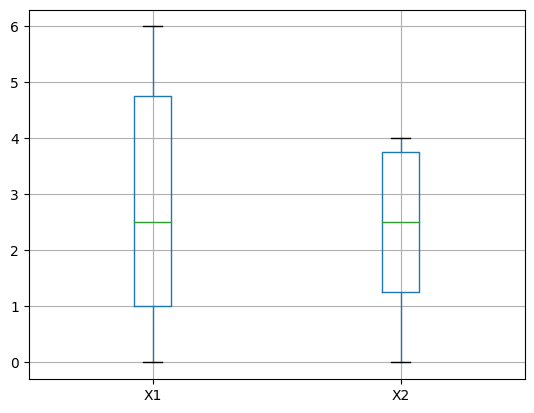

In [21]:
boxplot = dataSheet.boxplot(column=['X1','X2'])

### 1.3. Cual es la covarianza entre las 2 variables X1, X2

In [22]:
dataSheet.cov()

,X1,X2
X1,6.166667,-3.133333
X2,-3.133333,2.666667


### Cuál es la correlación entre la variable x1 y x2 (Calcularla a mano)

In [23]:
dataSheet.corr()

,X1,X2
X1,1.000000,-0.772675
X2,-0.772675,1.000000


### 1.6. Calcule el resultado del algoritmo K-means sobre este set de datos. Vamos a crear 2 grupos, es decir, k=2 (2 clusters).

In [43]:
dataSheetNorm = (dataSheet-dataSheet.min())/(dataSheet.max()-dataSheet.min())
dataSheetNorm

,X1,X2
id,,
1,0.166667,1.00
2,0.166667,0.75
3,0.000000,1.00
4,0.833333,0.25
5,1.000000,0.50
6,0.666667,0.00


In [44]:
clustering = KMeans(n_clusters=2,max_iter=300)
clustering.fit(dataSheetNorm)

C:\Users\jmora\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=2)

In [45]:
dataSheet['KMeans_Clusters'] = clustering.labels_
dataSheet.head()

,X1,X2,KMeans_Clusters
id,,,
1,1,4,0
2,1,3,0
3,0,4,0
4,5,1,1
5,6,2,1


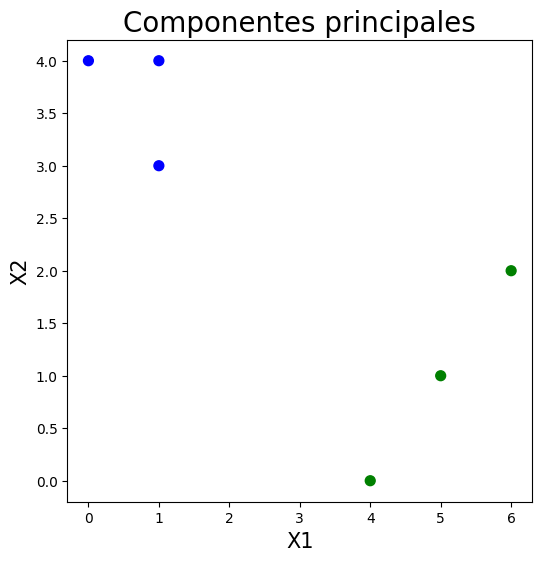

In [59]:
fig = plt.figure(figsize=(6,6))
ax = fig.add_subplot(1,1,1)
ax.set_xlabel('X1',fontsize = 15)
ax.set_ylabel('X2',fontsize = 15)
ax.set_title('Componentes principales',fontsize = 20)

color_theme = np.array(["blue","green"])
ax.scatter(x = dataSheet['X1'], y = dataSheet['X2'], c = color_theme[dataSheet['KMeans_Clusters']],s = 50)
plt.show()